In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('./pitcher_salaries_cleaned.csv')
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


### Create Salary Brackets
---

In [2]:
# look at distribution of salaries (suppressing scientific notation)
df['Salary'].describe().apply(lambda x: format(x, 'f'))

count        4937.000000
mean      3011304.443387
std       4265619.190449
min        100000.000000
25%        327000.000000
50%        980000.000000
75%       4000000.000000
max      33000000.000000
Name: Salary, dtype: object

In [3]:
# create salary brackets and labels
bins = [0, 499999, 4999999, 9999999, 34999999]
labels = ['low', 'mid', 'high', 'top']

In [4]:
# apply salary brackets
df['salBin'] = pd.cut(df['Salary'], bins=bins, labels=labels)
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started,salBin
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,low
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,low
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,low
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,low
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,mid
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,mid
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,mid
4935,2016,YoungChris,37,4250000,6.19,104,61,94,28,3,9,266,406,7,255,82,AL,KCA,13,mid


In [5]:
### Drop unnecessary columns
df= df.drop(["Full Name","Team","League","Age","Year","Salary"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,salBin
0,4.51,246,106,105,16,10,14,635,925,0,200,75,33,low
1,5.97,37,23,25,0,0,5,104,162,0,185,75,7,low
2,3.77,13,6,7,0,1,2,43,63,0,195,76,3,low
3,4.53,214,95,82,20,7,18,566,797,0,178,71,31,low
4,2.76,179,57,127,13,12,8,557,784,1,180,74,24,low


### Reduce number of rows
---
kept getting error in one-hot encoding, `ValueError: Buffer has wrong number of dimensions (expected 1, got 2)`<br>

some suggested reducing sample size would solve issue (https://github.com/lmcinnes/umap/issues/496)

-- Update: reducing sample size did not solve issue with one-hot encoding

### Encode Salary Bins column
---

In [6]:
# use get_dummies to one-hot encode the salarybin column
encoded_df=pd.get_dummies(df,columns=['salBin'],prefix="salBin")
encoded_df

,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,salBin_low,salBin_mid,salBin_high,salBin_top
0,4.51,246,106,105,16,10,14,635,925,0,200,75,33,1,0,0,0
1,5.97,37,23,25,0,0,5,104,162,0,185,75,7,1,0,0,0
2,3.77,13,6,7,0,1,2,43,63,0,195,76,3,1,0,0,0
3,4.53,214,95,82,20,7,18,566,797,0,178,71,31,1,0,0,0
4,2.76,179,57,127,13,12,8,557,784,1,180,74,24,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,3.53,84,34,56,11,2,2,260,365,13,240,74,4,0,1,0,0
4933,5.79,81,48,50,12,3,4,224,328,5,240,78,12,0,1,0,0
4934,3.33,138,58,127,12,13,6,470,656,0,215,74,24,0,1,0,0
4935,6.19,104,61,94,28,3,9,266,406,7,255,82,13,0,1,0,0


In [21]:
# export to csv for future use
encoded_df.to_csv('encoded_binned_df.csv', index=False)

### Split Features/Target & Training/Testing Sets
---
Split into features and target
- **y variable**: Our target variables, `Salary-Bin_low`, `Salary-Bin_mid`, `Salary-Bin_high`, `Salary-Bin_top`
- **X variable**: Our features

In [7]:
# Split our preprocessed data into our features and target arrays
y = encoded_df[["salBin_low","salBin_mid","salBin_high","salBin_top"]].values
X = encoded_df.drop(["salBin_low","salBin_mid","salBin_high","salBin_top"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Build and Instantiate `StandardScaler` object, then standardize numerical features
---

In [8]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Build Neural Net Framework
--- 


In [15]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 144
hidden_nodes_layer2 = 64
hidden_nodes_layer3 = 16


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 144)               2016      
                                                                 
 dense_5 (Dense)             (None, 64)                9280      
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 4)                 68        
                                                                 
Total params: 12,404
Trainable params: 12,404
Non-trainable params: 0
_________________________________________________________________


### Compile the Model
---

In [16]:
# Compile the model
nn.compile(loss="CategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

### Train the model
---

In [ ]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

39/39 - 0s - loss: 1.2470 - accuracy: 0.4219 - 91ms/epoch - 2ms/step
Loss: 124.70%, Accuracy: 42.19%


<AxesSubplot:>

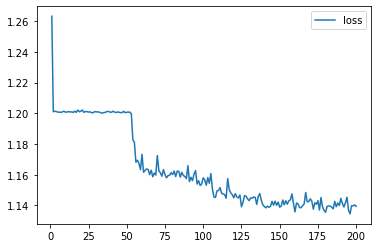

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

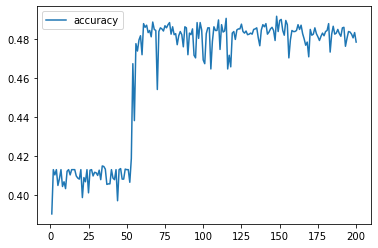

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")